<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Binomial_ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3002482047.py:24: RuntimeWarning: divide by zero encountered in log
  log_likelihoods = np.sum(np.log(likelihoods), axis=0)


Combined Likelihoods and Log-Likelihoods:
p = 0.1 -> Likelihood = 0.00000012, Log-Likelihood = -15.9047
p = 0.2 -> Likelihood = 0.00017328, Log-Likelihood = -8.6606
p = 0.3 -> Likelihood = 0.00455058, Log-Likelihood = -5.3925
p = 0.4 -> Likelihood = 0.01897003, Log-Likelihood = -3.9649
p = 0.5 -> Likelihood = 0.02239647, Log-Likelihood = -3.7989
p = 0.6 -> Likelihood = 0.00843113, Log-Likelihood = -4.7758
p = 0.7 -> Likelihood = 0.00083582, Log-Likelihood = -7.0871
p = 0.8 -> Likelihood = 0.00001083, Log-Likelihood = -11.4332
p = 0.9 -> Likelihood = 0.00000000, Log-Likelihood = -20.2992
p = 1.0 -> Likelihood = 0.00000000, Log-Likelihood = -inf

Maximum Likelihood Estimate (MLE):
p = 0.50 with likelihood = 0.02239647 and log-likelihood = -3.7989


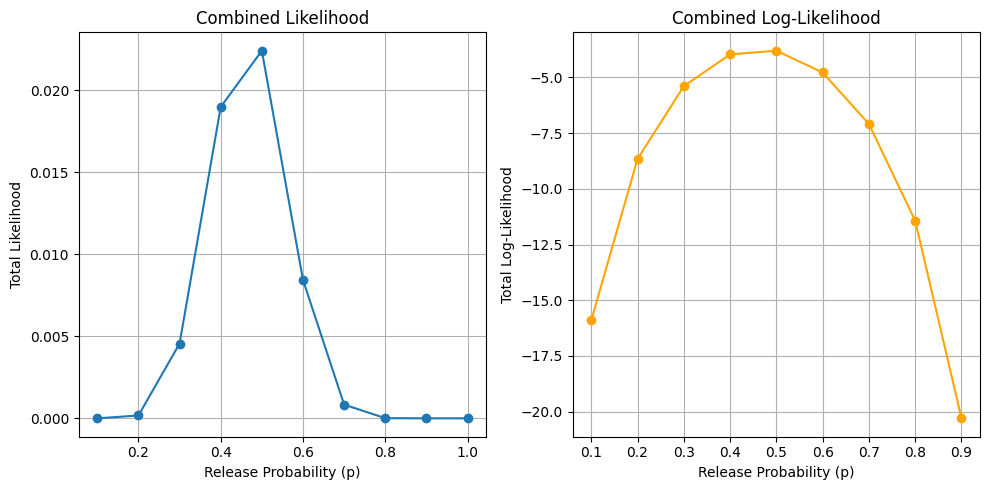

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 14                         # number of quanta
observations = [8, 5]         # two observed values

# Range of p values to test (deciles)
p_values = np.linspace(0.1, 1.0, 10)

# Compute individual likelihoods for each observation
likelihoods = []
for k in observations:
    likelihoods.append(binom.pmf(k, n, p_values))

# Convert to array for element-wise multiplication
#Converts the list of likelihood arrays into a 2D NumPy array, where:
#Row 0: likelihoods for observation 1 (8)
#Row 1: likelihoods for observation 2 (5)
#This format makes it easy to compute products and sums across observations (rows).
likelihoods = np.array(likelihoods)

# Compute total likelihood (product across observations)
#For each  p, compute the product of the likelihoods across the two observations.
total_likelihoods = np.prod(likelihoods, axis=0)

# Compute log-likelihood (sum of logs across observations)
log_likelihoods = np.sum(np.log(likelihoods), axis=0)

# Find MLE
#np.argmax() finds the index of the maximum likelihood value.
max_index = np.argmax(total_likelihoods)
mle_p = p_values[max_index]
max_likelihood = total_likelihoods[max_index]
max_log_likelihood = log_likelihoods[max_index]

# Print results
print("Combined Likelihoods and Log-Likelihoods:")
for p, L, logL in zip(p_values, total_likelihoods, log_likelihoods):
    print(f"p = {p:.1f} -> Likelihood = {L:.8f}, Log-Likelihood = {logL:.4f}")

print(f"\nMaximum Likelihood Estimate (MLE):")
print(f"p = {mle_p:.2f} with likelihood = {max_likelihood:.8f} and log-likelihood = {max_log_likelihood:.4f}")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(p_values, total_likelihoods, 'o-', label='Likelihood')
plt.xlabel('Release Probability (p)')
plt.ylabel('Total Likelihood')
plt.title('Combined Likelihood')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(p_values, log_likelihoods, 'o-', color='orange', label='Log-Likelihood')
plt.xlabel('Release Probability (p)')
plt.ylabel('Total Log-Likelihood')
plt.title('Combined Log-Likelihood')
plt.grid(True)

plt.tight_layout()
plt.show()

